#### Assignment 5: Neural Networks
NOTE : PLEASE DO NOT POST/SHARE THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING

References:
https://towardsdatascience.com/writing-your-first-neural-net-in-less-than-30-lines-of-code-with-keras-18e160a35502
https://www.kaggle.com/jserna/hyperparameters-optimization-on-fashion-mnist
https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392
http://www.cs.toronto.edu/ecosystem/papers/TBD-IISWC_18.pdf
http://yann.lecun.com/exdb/mnist/

Management Question
Suppose you are a healthcare company evaluating machine learning technologies for Optical Character Recognition(OCR). Initial testing is to be performed on the publicly available MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

Description:
Fit a neural network to the MNIST data, testing alternative network structures, activation functions, optimization methods, and/or hyperparameter settings. Assess classification performance accuracy and processing time. Python TensorFlow should be used for this Assignment. Note using Colab might help speed up processing time.

The Benchmark Experiment
Tested neural network structures should be explored within a benchmark experiment, a factorial design with at least two levels on each of two experimental factors (at least a 2x2 completely crossed design). But due to the time required to fit each neural network, we will observe only one trial for each cell in the design. Various machine learning hyperparameter settings may be used. For Ex: 

     Layers   Nodes    Time        TrainingAccuracy  TestingAccuracy
     2        10       25secs       0.935            0.827
     2        20
     5        10
     5        20



Students are encouraged to work in study teams on this assignment, with the understanding that each student must run the code himself/herself and write an independent report of the experimental results.An example of the results from this assignment should be provided in a table as defined towards the end of this notebook. In summary, this assignment asks you to fit a number of neural networks, comparing processing time and performance across experimental treatments.

Programming Resources
Géron, A. (2017). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O’Reilly. [ISBN-13 978-1-491-96229-9]. Chapter 11: Training Deep Neural Networks (pp. 275–312). Chapter 11 code (a Jupyter Notebook file 11_deep_learning.ipynb) shows how to use TensorFlow with the MNIST data set:
Source code available at via Github

Deliverables and File Formats
- Python notebook that address the problem and the writeup as indicated towards the end of this notebook (Audience:Director Data Science/Analytics)

Optional (Audience:Business/C-Suite) - Additional 20 points
1. Provide a double-spaced paper with a two-page maximum for the text. The paper in pdf format should include 
    (1) Summary and problem definition for management; 
    (2) Discussion of the methodology, data findings and traditional machine learning methods employed; 
    (3) List assumptions, programming work, issues along with model evaluation metrics; and 
    (4) Review of results/ insight swith recommendations for management.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:


NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.
- This code has a lot of errors so please make sure to updated all the cells based on best practices along with your analysis/findings.


GRADING GUIDELINES (100 points)
--------------------------------
(1) Data preparation, exploration, visualization (20 points)
(2) Review research design and modeling methods (20 points)
(3) Review results, evaluate models (20 points)
(4) Implementation and programming (20 points)
(5) Exposition, problem description, and management recommendations (20 points) 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import math
from timeit import default_timer as timer
import time
from datetime import timedelta
import matplotlib.pyplot as plt  # static plotting
import matplotlib as mpl
import matplotlib.cbook as cbook
from matplotlib import cm
import seaborn as sns  # pretty plotting, including heat map
import scipy
import tabulate
import socket
from scipy.stats import reciprocal
import sys
import os # Operation System
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score, cross_val_predict, learning_curve
from numpy import mean
from numpy import std
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, average_precision_score

# Python ≥3.5 is required
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
from tensorflow.keras.optimizers import SGD # addition of SGD for optimizer testing 

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

# set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# if you want to download the data directly from the source
def load_dataset():
    def download(filename,source="http://yann.lecun.com/exdb/mnist/"):
        print("Downloading",filename)
        import urllib.request
        urllib.request.urlretrieve(source+filename,filename)

    def load_mnist_image(filename):
        if not os.path.exists(filename):
            download(filename)

        import gzip

        with gzip.open(filename,'rb') as f:
            data=np.frombuffer(f.read(),np.uint8,offset=16)
            data=data.reshape(-1,1,28,28)

        return data/np.float32(256)

    def load_mnist_label(filename):
        if not os.path.exists(filename):
            download(filename)

        import gzip

        with gzip.open(filename,'rb') as f:
            data=np.frombuffer(f.read(),np.uint8,offset=16)

        return data
    
    x_train=load_mnist_image('train-images-idx3-ubyte.gz')
    y_train=load_mnist_label('train-labels-idx1-ubyte.gz')
    x_test=load_mnist_image('t10k-images-idx3-ubyte.gz')
    y_test=load_mnist_label('t10k-labels-idx1-ubyte.gz')

    return x_train,y_train,x_test,y_test


In [4]:
# Load the dataset
x_train,y_train,x_test,y_test=load_dataset()
print('X - '+str(len(x_train)))
print('Y - '+str(len(y_train)))

X - 60000
Y - 59992


In [5]:
# Another way - download data from Kaggle (https://www.kaggle.com/datasets/oddrationale/mnist-in-csv) 
# OR 
# from keras.datsets import mnist
# data = mnist.load_data()

# Details on the train dataset
df_train = pd.read_csv("mnist_train.csv")

#Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#and the data types for each variable
df_train.info()

# Use the head() method to inspect the first five (or more) rows of the data
df_train.head()

# shape of MNIST train Dataset
print('Shape of MNIST train dataset',df_train.shape)

# Summary Statistics of Dataset
df_train.describe().transpose()

df_train.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape of MNIST train dataset (60000, 785)


,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.453933,2.88927,0.0,2.0,4.0,7.0,9.0
1x1,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x2,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x3,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x4,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28x24,60000.0,0.002000,0.34660,0.0,0.0,0.0,0.0,62.0
28x25,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
28x26,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
28x27,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [6]:
# Details on the test dataset
df_test = pd.read_csv("mnist_test.csv")

#Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#and the data types for each variable
df_test.info()

# Use the head() method to inspect the first five (or more) rows of the data
df_test.head()

# shape of MNIST test Dataset
print('Shape of MNIST test dataset',df_test.shape)

# Summary Statistics of bankruptcy Dataset
df_test.describe().transpose()

df_test.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape of MNIST test dataset (10000, 785)


,count,mean,std,min,25%,50%,75%,max
label,10000.0,4.4434,2.895865,0.0,2.0,4.0,7.0,9.0
1x1,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
1x2,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
1x3,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
1x4,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28x24,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
28x25,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
28x26,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
28x27,10000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0


Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [7]:
# Checking for Missing values in train dataset
print('Missing value in MNIST train data: ',df_train.isnull().sum().sum())

# Checking for duplicates in train dataset
print('Duplicates in MNIST train data: ',df_train.duplicated().sum())

Missing value in MNIST train data:  0
Duplicates in MNIST train data:  0


In [8]:
# Checking for Missing values in test dataset
print('Missing value in MNIST test data: ',df_test.isnull().sum().sum())

# Checking for duplicates in test dataset
print('Duplicates in MNIST test data: ',df_test.duplicated().sum())

Missing value in MNIST test data:  0
Duplicates in MNIST test data:  0


In [9]:
# Inspect class balances for train set.
print(df_train['label'].value_counts(ascending=False))
print(df_train['label'].value_counts(normalize=True))

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64
1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: label, dtype: float64


([<matplotlib.patches.Wedge at 0x247291c1460>,
 [Text(-0.3080515255535282, 1.0559849703495519, ''),
  Text(-0.8432902660741608, 0.7063013005400537, ''),
  Text(-1.0960305030789685, 0.09336560566109704, ''),
  Text(-0.948395649211471, -0.5572662671979641, ''),
  Text(-0.4480942039110129, -1.0045952341223583, ''),
  Text(0.22075317451124254, -1.0776214715488963, ''),
  Text(0.808380032274367, -0.7460038360625857, ''),
  Text(1.0930696076182473, -0.12328354675824019, ''),
  Text(0.9453175875684712, 0.562471918084562, ''),
  Text(0.3802964007197028, 1.0321698734218314, '')],
 [Text(-0.23803981520045359, 0.8159883861791991, '9.0%'),
  Text(-0.6516333874209423, 0.5457782776900414, '9.7%'),
  Text(-0.8469326614701119, 0.07214614982902952, '9.8%'),
  Text(-0.7328511834815912, -0.43061484283479035, '9.9%'),
  Text(-0.3462546121130554, -0.7762781354581858, '9.9%'),
  Text(0.17058199848596012, -0.832707500742329, '9.9%'),
  Text(0.6246572976665563, -0.5764575096847253, '9.9%'),
  Text(0.844644696

Text(0.5, 1.0, 'Digit Label Distribution')

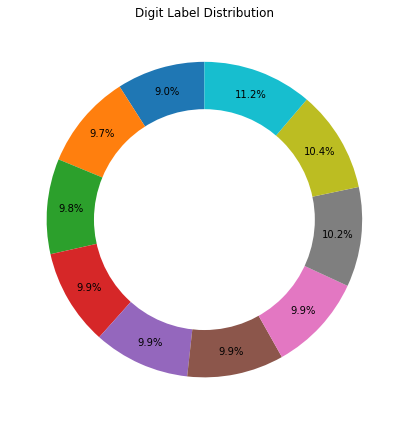

In [10]:
# Data Distribution
values = df_train['label'].value_counts().sort_values(ascending = True)

colors = sns.color_palette()

#create pie chart to see the distribution of label variable of interest
plt.pie(values, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(6,6)
# Equal aspect ratio ensures that pie is drawn as a circle 
plt.title("Digit Label Distribution") 
plt.tight_layout()
plt.show()

In [11]:
X_train, y_train = df_train.loc[:, df_train.columns != 'label'], df_train["label"]
X_train.shape
X_train.head()
y_train.shape
y_train.head()

(60000, 784)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(60000,)

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [12]:
def plot_digit(data):
    image = data.values.reshape(28, 28)
    plt.imshow(image)
    plt.axis("off")
    

def plot_digits(col):
    # plot the first 100 digits in the training set. 
    f, ax = plt.subplots(10, 10, figsize=(11, 11))
    
    # plot some 4s as an example
    for i in range(101):
        # Create a 1024x1024x3 array of 8 bit unsigned integers
        data = col.iloc[i,0:785].values # This is the first number
        nrows, ncols = 28, 28
        grid = data.reshape((nrows, ncols))
        n=math.ceil(i/10)-1
        m=[0,1,2,3,4,5,6,7,8,9]*10
        ax[m[i-1], n].imshow(grid)

In [13]:
# Function return digit in grayscale
def plot_digit_grayscale(digit, dem = 28, font_size = 12, pixels = 255.0):
    max_ax = font_size * dem
    
    fig = plt.figure(figsize=(13, 13))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000'
    
    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)
            c = digit[jdx][idx] / pixels
            t.set_bbox(dict(facecolor=(c, c, c), alpha = 0.3, edgecolor = 'gray'))
            
    plt.show()

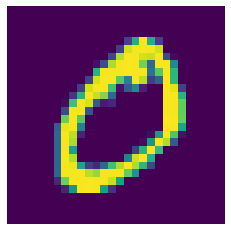

In [14]:
# Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, 
# reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow() function:
digit_0 = X_train.loc[1, "1x1":]
plot_digit(digit_0)

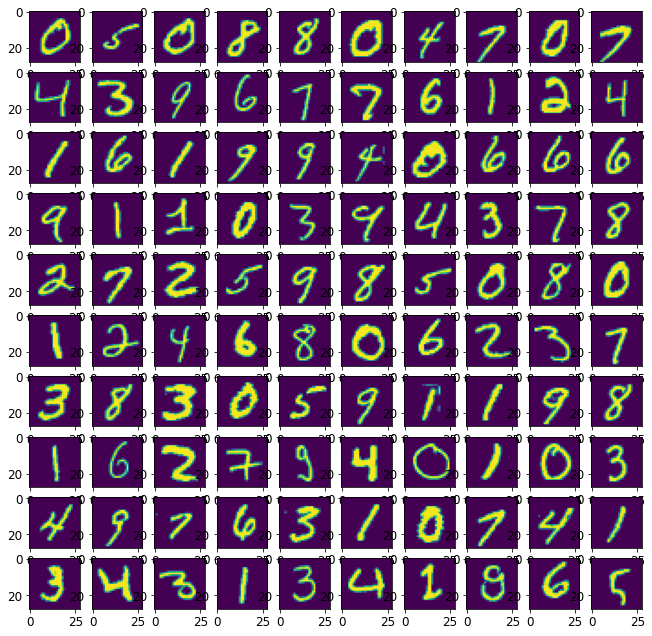

In [15]:
plot_digits(X_train)

In [16]:
#print the labeled value for 4th row, It should be 9 as visualized in above plot.
y_train.loc[4]

9

The reason for normalizing the images is to avoid the possibility of exploding gradients because of the high range of the pixels [0, 255], and improve the convergence speed. Therefore, we can either standardize the each image, so that the range is [-1, 1] or you just divide the with the maximum pixel value as you are doing, so that the range of the pixels is in the [0, 1] range. Lets try to visualize the grayscale for digit 7.

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Pixel Value Distribution')

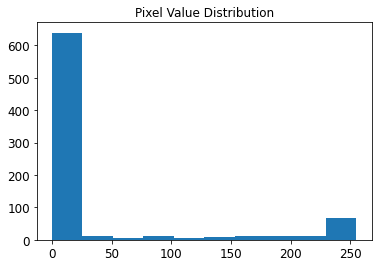

In [17]:
#visualize pixel distribution to see the range and distribution
plt.hist(X_train.values[0].reshape(784))
plt.title("Pixel Value Distribution")

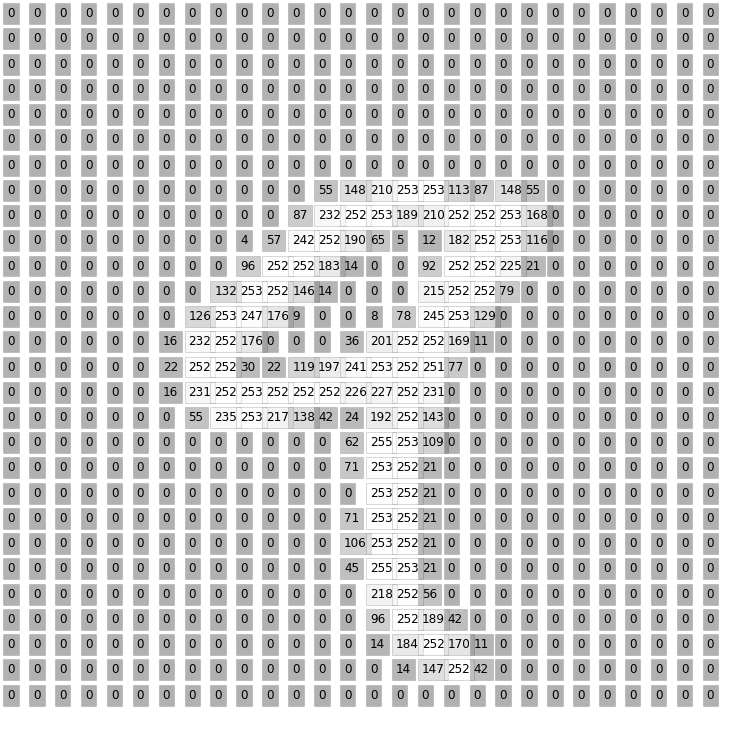

In [18]:
#visualize a digit in gray scale to understand the distribution.
X_train_plot= X_train.values.reshape(-1, 28, 28)
plot_digit_grayscale(X_train_plot[4])

As you can see in the above plot, the values range from 0 to 256. Now, lets try to visualize the same digit by dividing by 255 i.e. pixel range in grayscale.

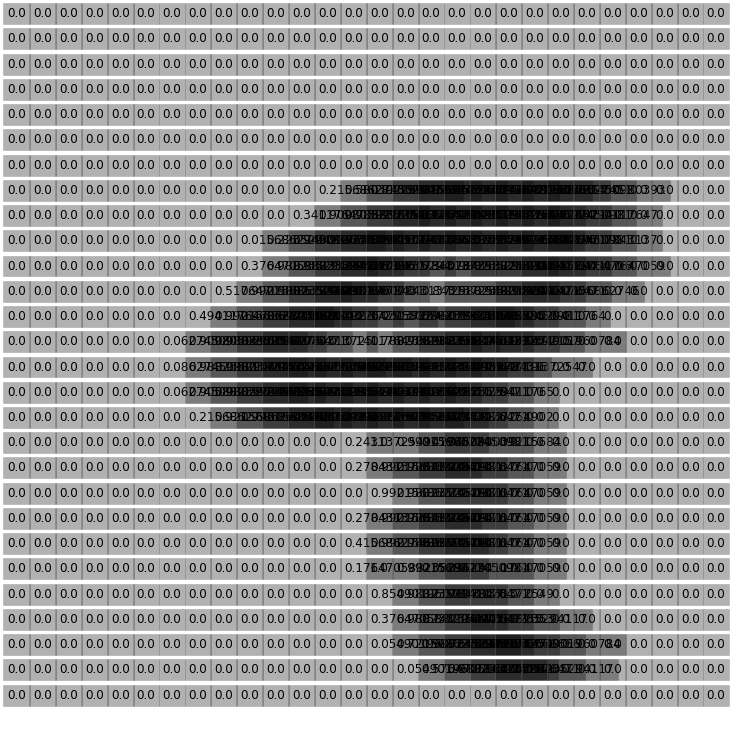

In [19]:
#normalize the distribution by diving 255.0 and then visualize a digit in gray scale.
X_train_norm = X_train / 255.0
X_train_norm_plot= X_train_norm.values.reshape(-1, 28, 28)
plot_digit_grayscale(X_train_norm_plot[4])

As we can see that pixels that make the strokes in 7 image are 0.98 or 0.99 or near by values. So, we will apply the normalization later to get good convergence speed.

#### Model Development

In [20]:
# Split the train and the validation set for the fitting 
# Since we have balanced labels, no need to use stratify = True option in train_test_split function
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle=True, random_state=1)
X_trn.shape, X_val.shape, y_trn.shape, y_val.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [21]:
#Convert to numpy array

#train data
x_train=X_trn.to_numpy()
y_train=y_trn.to_numpy()

#validation data
x_valid=X_val.to_numpy()
y_valid=y_val.to_numpy()

#final test data
X_test =df_test.to_numpy()


In [22]:
# reshape dataset to have a single channel
width, height, channels = 28, 28, 1
X_train = x_train.reshape((x_train.shape[0], width, height, channels)) / 255.0
X_valid = x_valid.reshape((x_valid.shape[0], width, height, channels)) / 255.0
X_test = x_test.astype(np.float32).reshape(X_test.shape[0], width, height, channels) / 255.0

# one hot encode target values (convert class vectors to binary class matrices), num_classes will take max(y) + 1 i.e. 10 digits
y_train = keras.utils.to_categorical(y_train)
y_valid = keras.utils.to_categorical(y_valid)


In [23]:
#Tensorboard Logs
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)    

In [24]:
# Actual model is generated here. One of the most basic neural network layers is the dense layer(AKA fully connected layer)
# There are many activation functions out there, Relu(rectified linear unit) and it's variants are currently the most popular
# For Optimizer functions, Adam and it's variants are popular as well, but SGD with with good hyperparameters are good too
# binary_crossentropy paired with softmax as the last activation is typical for classification problems

def generateModel(n_hidden=[(10, 20)], learning_rate=1e-4, outputSize= 10):

    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for index, layer in enumerate(n_hidden):
      model.add(keras.layers.Dense(layer, activation="relu"))
      model.add(keras.layers.Dropout(0.2))   
    
    
    #last layer is below. In classification problems, number of neurons in the last layer is the same as the number of possible
    #labels
    model.add(keras.layers.Dense(outputSize, activation='softmax'))

    optimizer = keras.optimizers.Adam(learning_rate)

    #"categorical_crossentropy" loss  as we have converted the labels to categorical. 
    # otherwise use "sparse_categorical_crossentropy" loss if we have sparse labels.
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

## I made the following changes to my model:

### -Change activation method from relu to sigmoid. My hypothesis here is this will outperform relu for binary classification 

#### Add hyperparameters for SGD to test against current optimizer (Adam). SGD optimizer yielded slightly lower results than Adam

In [25]:
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [26]:
def generateNickModel(n_hidden=[(10, 20)], learning_rate=1e-4, outputSize= 10):

    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for index, layer in enumerate(n_hidden):
      model.add(keras.layers.Dense(layer, activation="sigmoid"))
      model.add(keras.layers.Dropout(0.2))   
    
    
    #last layer is below. In classification problems, number of neurons in the last layer is the same as the number of possible
    #labels
    model.add(keras.layers.Dense(outputSize, activation='softmax'))

    optimizer = keras.optimizers.Adam(learning_rate)

    #"categorical_crossentropy" loss  as we have converted the labels to categorical. 
    # otherwise use "sparse_categorical_crossentropy" loss if we have sparse labels.
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [27]:
# Learning curve function to visualize accuracy and loss in train and validation set.
def draw_learning_curve(history, keys=['accuracy', 'loss']):
    plt.figure(figsize=(20,8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sns.lineplot(x = history.epoch, y = history.history[key])
        sns.lineplot(x = history.epoch, y = history.history['val_' + key])
        plt.title('Learning Curve')
        plt.ylabel(key.title())
        plt.grid(True)
        plt.gca().set_ylim(0, 1)
        plt.xlabel('Epoch')
        plt.legend(['train', 'test'], loc='best')
    plt.show()

### Original model loss/accuracy: loss: 0.0449 - accuracy: 0.9864

### Best using Nick's Model: loss: 0.0371 - accuracy: 0.9885. Nick's model replaces the activation funtion form relu to sigmoid.

In [28]:
#Using RandomizedSearchCV for cross validation
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_fn=generateNickModel)
   
param_grid = {
  "n_hidden": ([(512, 256, 128)]),
  "learning_rate": [0.001, 0.01],
  'epochs': [10, 20],
}

rs_keras_cv = RandomizedSearchCV(keras_clf, param_grid, cv=3, n_jobs=-1,scoring="accuracy")
    
rs_keras_cv.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

print('Best score obtained: {0}'.format(rs_keras_cv.best_score_))
print('Parameters:')
for param, value in rs_keras_cv.best_params_.items():
    print('\t{}: {}'.format(param, value))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5068 - accuracy: 0.8459 - val_loss: 0.2105 - val_accuracy: 0.9375
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1935 - accuracy: 0.9434 - val_loss: 0.1578 - val_accuracy: 0.9527
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1370 - accuracy: 0.9596 - val_loss: 0.1265 - val_accuracy: 0.9613
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1048 - accuracy: 0.9692 - val_loss: 0.1022 - val_accuracy: 0.9694
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0851 - accuracy: 0.9742 - val_loss: 0.0906 - val_accuracy: 0.9738
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0672 - accuracy: 0.9800 - val_loss: 0.0922 - val_accuracy: 0.9733
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0581 - accuracy: 0.9817 - val_loss: 0.0820 - val_accuracy:

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000247290F3DF0>,
                   n_jobs=-1,
                   param_distributions={'epochs': [10, 20],
                                        'learning_rate': [0.001, 0.01],
                                        'n_hidden': [(512, 256, 128)]},
                   scoring='accuracy')

Best score obtained: nan
Parameters:
	n_hidden: (512, 256, 128)
	learning_rate: 0.001
	epochs: 10


In [29]:
#Clear and Reset log tensorflow
keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

#Reset Log Directory
run_logdir = get_run_logdir()

#Execution with early Stopping
start_time = time.process_time()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./my_keras_model.h5", save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(monitor='loss', mode ='min', min_delta=1, patience=10)

In [30]:
 #Test  2 Hidden Layers Nodes Per Layer - [(350, 200), (350, 200)]
model1 = generateNickModel(n_hidden=([350, 200]), learning_rate=0.001)
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 350)               274750    
                                                                 
 dropout (Dropout)           (None, 350)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               70200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 346,960
Trainable params: 346,960
Non-trai

### Adjusting the epochs here to align with the hyperparamter grid search results we found (closer to 10) yielded better accuracy and val loss

In [31]:
# fit and evalutae model 1 with 2 hidden layer.
start = timer()
history1 = model1.fit(X_train, y_train, epochs=11,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])
final_loss, final_acc = model1.evaluate(X_valid, y_valid)
end = timer()
elapsed_time = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model1 with 2 hidden layer".format(final_loss, final_acc*100))
print("Model 1 with 2 hidden layer training time in seconds", elapsed_time)

Epoch 1/11
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4511 - accuracy: 0.8677 - val_loss: 0.2234 - val_accuracy: 0.9308
Epoch 2/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2015 - accuracy: 0.9391 - val_loss: 0.1581 - val_accuracy: 0.9500
Epoch 3/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1444 - accuracy: 0.9561 - val_loss: 0.1183 - val_accuracy: 0.9616
Epoch 4/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1099 - accuracy: 0.9662 - val_loss: 0.1089 - val_accuracy: 0.9654
Epoch 5/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9714 - val_loss: 0.0930 - val_accuracy: 0.9703
Epoch 6/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0708 - accuracy: 0.9778 - val_loss: 0.0903 - val_accuracy: 0.9722
Epoch 7/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0615 - accuracy: 0.9803 - val_loss: 0.0836 - val_accuracy:

In [32]:
_, train_acc = model1.evaluate(X_train, y_train)
Model = "Model 1"
results = pd.DataFrame(columns = ['Model', 'layers', 'Nodes', 'Time', 'Train-accuracy', 'Test-Accuracy'])
row = [Model, 2 , 350, elapsed_time, train_acc, final_acc]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)

1500/1500 [==============================] - 1s 815us/step - loss: 0.0133 - accuracy: 0.9962


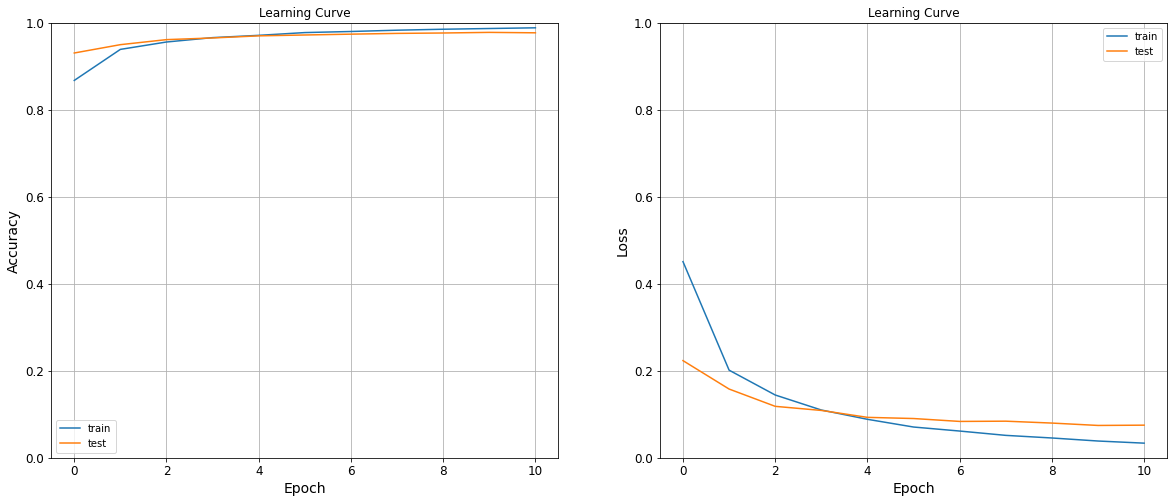

In [33]:
# Visualize laerning curve for model 1 with 2 hidden layer.
draw_learning_curve(history1)

### Adjusted the n_hidden layer amounts from to align with hyperparameter tuning, but it yielded minimal/no gain

In [34]:
 #Test  3 Hidden Layers Nodes Per Layer - [(300, 200, 100), (300, 200, 100), (300, 200, 100)]
model2 = generateNickModel(n_hidden=([512, 256, 128]), learning_rate=0.001)
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [35]:
# fit and evaluate model 2 with 3 hidden layer.
start = timer()
history2 = model2.fit(X_train, y_train, epochs=11,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])
final_loss2, final_acc2 = model2.evaluate(X_valid, y_valid)
end = timer()
elapsed_time2 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model2 with 2 hidden layer".format(final_loss2, final_acc2*100))
print("Model 2 with 3hidden layer training time in seconds", elapsed_time2)

Epoch 1/11
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4973 - accuracy: 0.8480 - val_loss: 0.2034 - val_accuracy: 0.9362
Epoch 2/11
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1881 - accuracy: 0.9432 - val_loss: 0.1444 - val_accuracy: 0.9553
Epoch 3/11
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1349 - accuracy: 0.9601 - val_loss: 0.1096 - val_accuracy: 0.9662
Epoch 4/11
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1033 - accuracy: 0.9687 - val_loss: 0.1035 - val_accuracy: 0.9682
Epoch 5/11
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0828 - accuracy: 0.9743 - val_loss: 0.1069 - val_accuracy: 0.9672
Epoch 6/11
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0678 - accuracy: 0.9786 - val_loss: 0.0908 - val_accuracy: 0.9732
Epoch 7/11
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0572 - accuracy: 0.9818 - val_loss: 0.0954 - val_accuracy:

In [36]:
_, train_acc2 = model2.evaluate(X_train, y_train)
Model = "Model 2"
row = [Model, 3 , 300, elapsed_time2, train_acc2, final_acc2]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0135 - accuracy: 0.9958


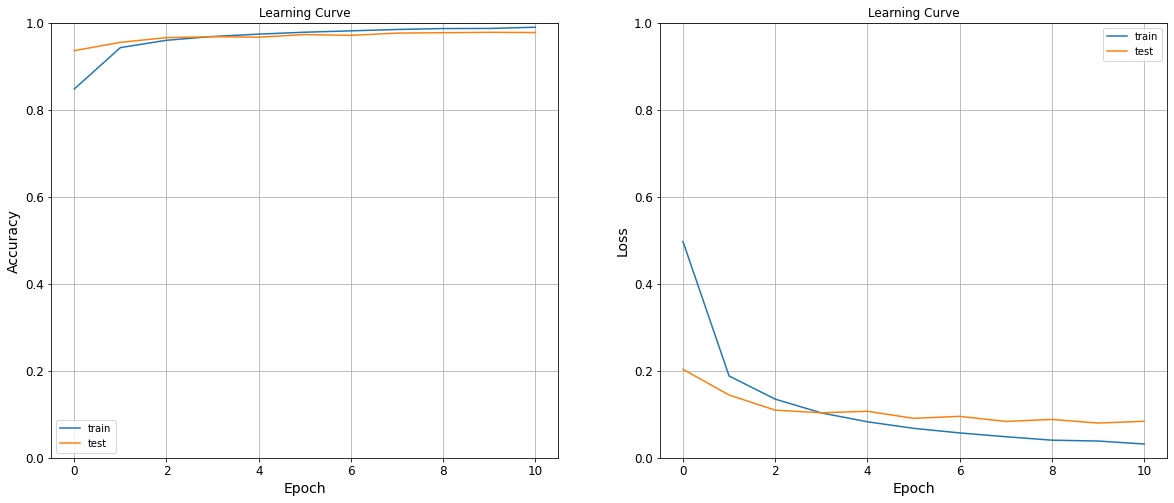

In [37]:
# Visualize learning curve for model 2 with 3 hidden layer.
draw_learning_curve(history2)

### We can see below that model3 has a significant loss in accuracy and increase in loss. 

In [38]:
 #Test  3 Hidden Layers Nodes Per Layer - [(512, 512, 300, 200), (512, 512, 300, 200), (512, 512, 300, 200), (512, 512, 300, 200)]
model3 = generateNickModel(n_hidden=([512, 512, 300, 200]))
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               153900    
                                                                 
 dropout_7 (Dropout)         (None, 300)              

In [39]:
# fit and evaluate model 3 with 4 hidden layer.
start = timer()
history3 = model3.fit(X_train, y_train, epochs = 20, verbose = 2, 
                      validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])
final_loss3,final_acc3 = model3.evaluate(X_valid, y_valid)
end = timer()
elapsed_time3 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model2 with 2 hidden layer".format(final_loss3, final_acc3*100))
print("Model 2 with 3hidden layer training time in seconds", elapsed_time3)

Epoch 1/20
1500/1500 - 8s - loss: 1.5901 - accuracy: 0.4416 - val_loss: 0.7949 - val_accuracy: 0.7634 - 8s/epoch - 5ms/step
Epoch 2/20
1500/1500 - 7s - loss: 0.6587 - accuracy: 0.8018 - val_loss: 0.4629 - val_accuracy: 0.8668 - 7s/epoch - 5ms/step
Epoch 3/20
1500/1500 - 7s - loss: 0.4629 - accuracy: 0.8648 - val_loss: 0.3698 - val_accuracy: 0.8894 - 7s/epoch - 5ms/step
Epoch 4/20
1500/1500 - 7s - loss: 0.3855 - accuracy: 0.8867 - val_loss: 0.3218 - val_accuracy: 0.9018 - 7s/epoch - 5ms/step
Epoch 5/20
1500/1500 - 7s - loss: 0.3437 - accuracy: 0.8990 - val_loss: 0.2915 - val_accuracy: 0.9128 - 7s/epoch - 5ms/step
Epoch 6/20
1500/1500 - 7s - loss: 0.3122 - accuracy: 0.9082 - val_loss: 0.2676 - val_accuracy: 0.9195 - 7s/epoch - 5ms/step
Epoch 7/20
1500/1500 - 7s - loss: 0.2865 - accuracy: 0.9162 - val_loss: 0.2516 - val_accuracy: 0.9237 - 7s/epoch - 5ms/step
Epoch 8/20
1500/1500 - 7s - loss: 0.2645 - accuracy: 0.9216 - val_loss: 0.2309 - val_accuracy: 0.9312 - 7s/epoch - 5ms/step
Epoch 9/

In [40]:
_, train_acc3 = model3.evaluate(X_train, y_train)
Model = "Model 3"
row = [Model, 4 , 512, elapsed_time3, train_acc3, final_acc3]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.1467 - accuracy: 0.9565


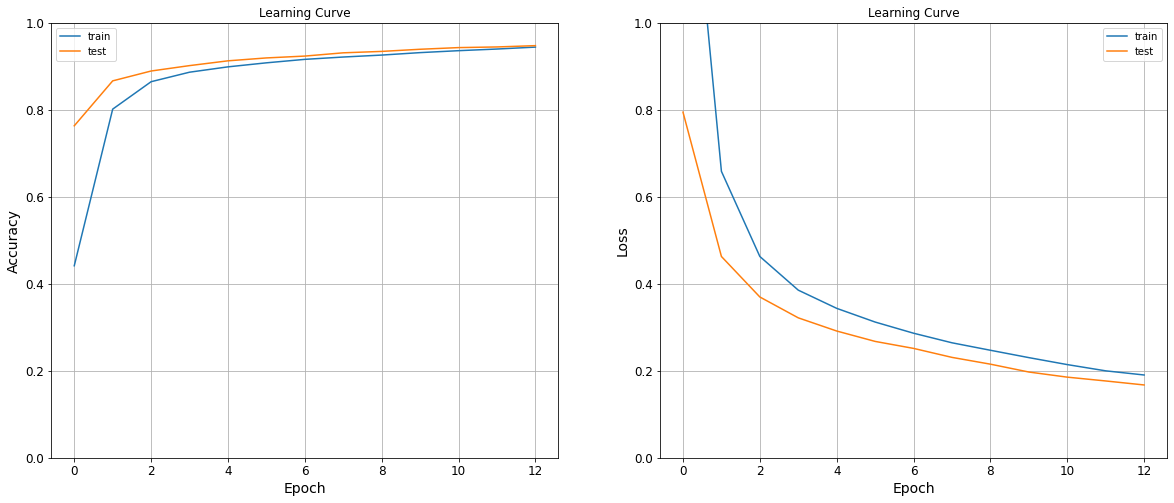

In [41]:
# Visualize learning curve for model 3 with 4 hidden layer.
draw_learning_curve(history3)

## Adding additional hidden layer here to see if it outperforms the other outputs 

### As noted above, we see a significant dip from 3 hidden layers to 4. This continues that trend (loss of accuracy, increase in val loss)

In [42]:
 #Test  4 Hidden Layers Nodes Per Layer - [(512, 512, 300, 200, 100), ((512, 512, 300, 200, 100)), ((512, 512, 300, 200, 100)), ((512, 512, 300, 200, 100))]
model4 = generateNickModel(n_hidden=([512, 512, 300, 200, 100]))
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 300)               153900    
                                                                 
 dropout_11 (Dropout)        (None, 300)              

In [43]:
# fit and evaluate model 4 with 5 hidden layer.
start = timer()
history4 = model4.fit(X_train, y_train, epochs = 20, verbose = 2, 
                      validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])
final_loss4,final_acc4 = model4.evaluate(X_valid, y_valid)
end = timer()
elapsed_time4 = timedelta(seconds=end-start)
print("Final loss: {0:.6f}, final accuracy: {1:.6f} for model2 with 2 hidden layer".format(final_loss4, final_acc4*100))
print("Model 2 with 3hidden layer training time in seconds", elapsed_time4)

Epoch 1/20
1500/1500 - 8s - loss: 1.9555 - accuracy: 0.2514 - val_loss: 1.3454 - val_accuracy: 0.4957 - 8s/epoch - 5ms/step
Epoch 2/20
1500/1500 - 8s - loss: 1.1417 - accuracy: 0.5985 - val_loss: 0.8024 - val_accuracy: 0.7735 - 8s/epoch - 5ms/step
Epoch 3/20
1500/1500 - 8s - loss: 0.7570 - accuracy: 0.7682 - val_loss: 0.5772 - val_accuracy: 0.8323 - 8s/epoch - 5ms/step
Epoch 4/20
1500/1500 - 8s - loss: 0.5870 - accuracy: 0.8294 - val_loss: 0.4527 - val_accuracy: 0.8692 - 8s/epoch - 5ms/step
Epoch 5/20
1500/1500 - 8s - loss: 0.4737 - accuracy: 0.8680 - val_loss: 0.3727 - val_accuracy: 0.8921 - 8s/epoch - 5ms/step
Epoch 6/20
1500/1500 - 8s - loss: 0.4004 - accuracy: 0.8893 - val_loss: 0.3271 - val_accuracy: 0.9068 - 8s/epoch - 5ms/step
Epoch 7/20
1500/1500 - 8s - loss: 0.3578 - accuracy: 0.9002 - val_loss: 0.2932 - val_accuracy: 0.9137 - 8s/epoch - 5ms/step
Epoch 8/20
1500/1500 - 8s - loss: 0.3186 - accuracy: 0.9113 - val_loss: 0.2696 - val_accuracy: 0.9208 - 8s/epoch - 5ms/step
Epoch 9/

In [44]:
_, train_acc4 = model4.evaluate(X_train, y_train)
Model = "Model 4"
row = [Model, 5, 512, elapsed_time4, train_acc4, final_acc4]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.1644 - accuracy: 0.9526


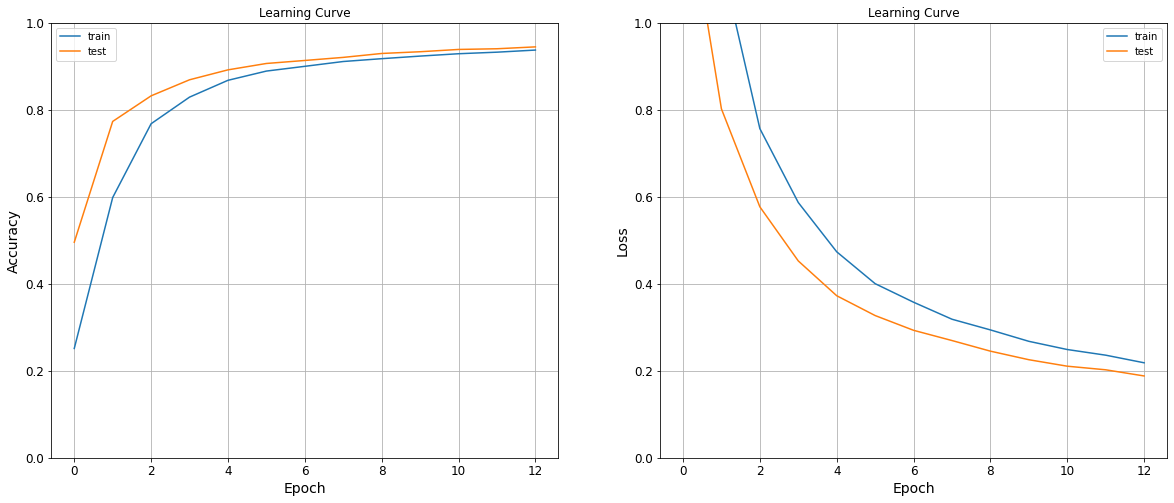

In [45]:
# Visualize learning curve for model 4 with 5 hidden layer.
draw_learning_curve(history4)

## After making some adjustments, model2 proved to be the most effective model. Therefore we will save model2

In [46]:
# saving the model with less validation loss and more accuracy i.e. model 1 with 2 hidden layer
save_dir = "/results/"
model_name = 'keras_mnist_1.h5'
model_path = os.path.join(save_dir, model_name)
model2.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_mnist_1.h5 


In [47]:
# predict the labels using model 1 with 2 hidden layer.
X_new = X_test[:10] # pretend we have new images
y_pred_nw =np.argmax(model2.predict(X_new), axis=-1)
y_pred =np.argmax(model2.predict(X_valid), axis=-1)

#Create Predicted Value
start_time = time.process_time()

In [48]:
#View actual to predicted
print("Predicted classes:", y_pred[:20])
print("Actual classes:   ", np.argmax(y_valid[:20], axis=-1))

Predicted classes: [3 2 7 8 2 3 5 2 8 9 3 9 1 2 7 2 8 1 3 3]
Actual classes:    [3 2 7 8 2 3 5 2 8 9 3 9 1 2 7 2 8 1 3 3]


In [49]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir my_logs

Reusing TensorBoard on port 6006 (pid 24048), started 2:55:46 ago. (Use '!kill 24048' to kill it.)

In [50]:
# Evaluate model accuracy, loss and error for model 1 with 2 hidden layer.
score = model2.evaluate(X_valid, y_valid)
print('Test loss: {}%'.format(score[0] * 100))
print('Test score: {}%'.format(score[1] * 100))

print("MLP Error: %.2f%%" % (100 - score[1] * 100))

375/375 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9779
Test loss: 8.398636430501938%
Test score: 97.79166579246521%
MLP Error: 2.21%



11735  classified correctly
265  classified incorrectly


<AxesSubplot:>

Text(0.5, 1.0, 'Predicted: 3, Truth: 3')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted: 2, Truth: 2')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted: 7, Truth: 7')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted: 8, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted: 2, Truth: 2')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted: 3, Truth: 3')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted: 5, Truth: 5')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted: 2, Truth: 2')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted: 8, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted 6, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted 3, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted 8, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted 8, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted 0, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted 8, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted 3, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted 5, Truth: 8')

([], [])

([], [])

<AxesSubplot:>

Text(0.5, 1.0, 'Predicted 5, Truth: 8')

([], [])

([], [])

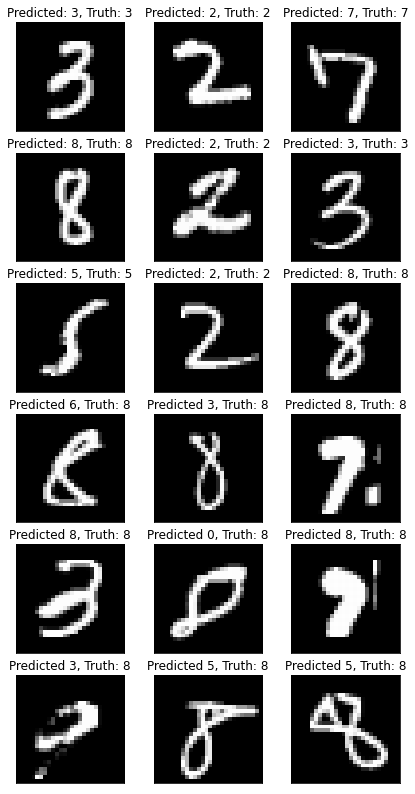

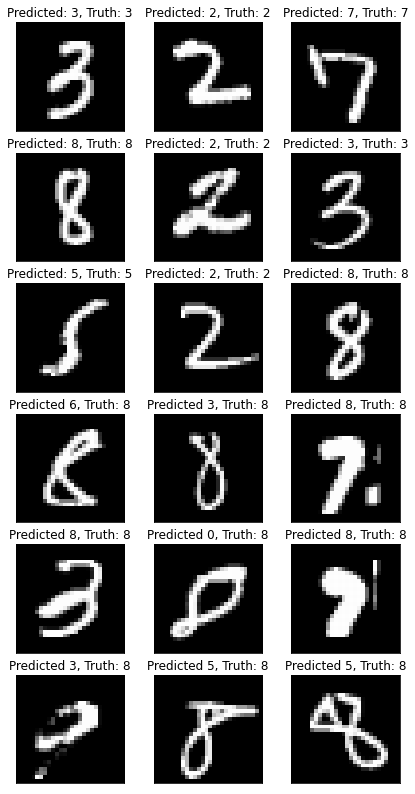

In [51]:
#Visualize Correct and Incorrect prediction using saved best model.
# load the model and create predictions on the test set
mnist_model = keras.models.load_model(model_path)
predicted_classes = np.argmax(mnist_model.predict(X_valid), axis=-1)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == np.argmax(y_valid, axis=-1))[0]
incorrect_indices = np.nonzero(predicted_classes != np.argmax(y_valid, axis=-1))[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_valid[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        np.argmax(y_valid[correct], axis=-1)))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_valid[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                        np.argmax(y_valid[correct], axis=-1)))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

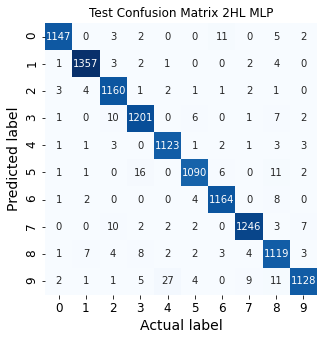

In [52]:
plt.figure(figsize=(5,5))
cm_tst = confusion_matrix(np.argmax(y_valid, axis=-1), y_pred)
cm_tst_plt=sns.heatmap(cm_tst.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Test Confusion Matrix 2HL MLP");

In [53]:
print(classification_report(np.argmax(y_valid, axis=-1), y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1158
           1       0.99      0.99      0.99      1373
           2       0.99      0.97      0.98      1194
           3       0.98      0.97      0.97      1237
           4       0.99      0.97      0.98      1157
           5       0.97      0.98      0.97      1110
           6       0.99      0.98      0.98      1187
           7       0.98      0.98      0.98      1265
           8       0.97      0.95      0.96      1172
           9       0.95      0.98      0.97      1147

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [54]:
results.set_index("Model", drop = True, inplace = True)
results.sort_values(by=['Test-Accuracy'], ascending=False)

,layers,Nodes,Time,Train-accuracy,Test-Accuracy
Model,,,,,
Model 2,3,300,0 days 00:00:54.981831,0.995833,0.977917
Model 1,2,350,0 days 00:00:35.677144,0.996167,0.977250
Model 3,4,512,0 days 00:01:36.623751,0.956542,0.947750
Model 4,5,512,0 days 00:01:40.842323,0.952625,0.944917


<AxesSubplot:title={'center':'Score'}, xlabel='Model'>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Model 1'),
  Text(1, 0, 'Model 2'),
  Text(2, 0, 'Model 3'),
  Text(3, 0, 'Model 4')])

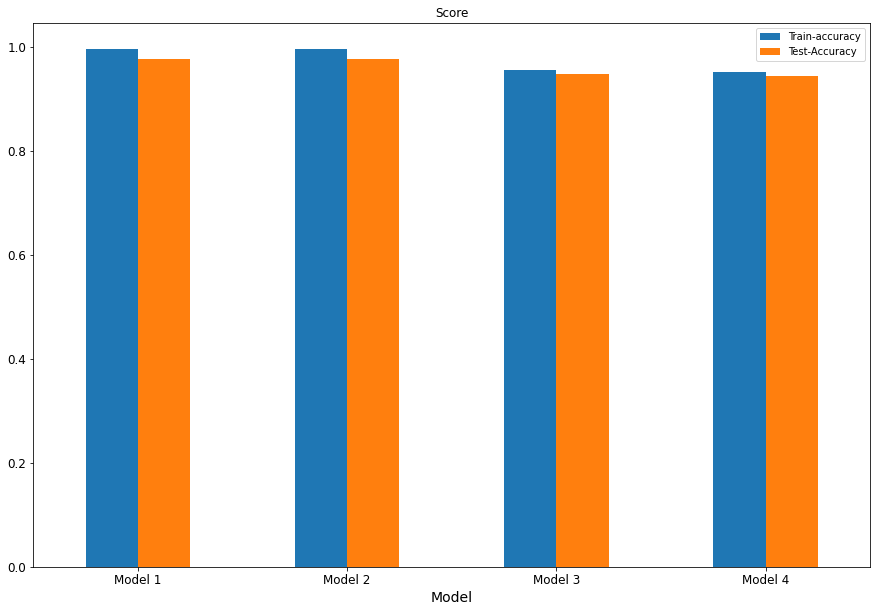

In [55]:
results[['Train-accuracy', 'Test-Accuracy']].plot(kind='bar', title ="Score", figsize=(15, 10))
plt.xticks(rotation='horizontal')

Management Problem:
From a management perspective, the predictive accuracy of models must be weighed against the costs of model development and implementation. Suppose you were the manager of a data science team responsible for implementing models for computer vision (classification of images analogous to the MINST problem). Would you recommend using PCA as a preliminary to machine learning classification? Explain your thinking.


#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.

## (1) A summary and problem definition for management;

Technical Overview: As a healthcare company evaluating machine learning technologies for Optical Character Recognition (OCR), we are testing the MNIST digit dataset to test various concepts within the neural networks space to outline best practices related to model tuning. Essentially, we are trying to determine which neural network typology and hyperparameter settings to recommend. To go about this task, we will fit a neural network to the MNIST data, testing alternative network structures, activation functions, optimization methods, and/or hyperparameter settings. We will then assess classification performance accuracy and processing time.

Management Overview: We would like to design a tool that will automate tasks related to recognizing points of interest/indicators in our medical images. This is to free staffing resources and allow them to spend more time looking at nuanced portions of images required human intervention. Prior to incorporating this model, we are testing different modeling parameters to ensure best practices are followed when we develop our model.

## (2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed

We start by loading the MNIST dataset/required packages, outlining the dataset’s shape, number of missing values (none), and distribution of digits. We then break the dataset into testing, training, and validation sets for modeling purposes. This includes normalizing the training data to improve convergence speed. After this, we reshape the data to have a single channel (improving the dimensions in our array) and use one hot encoding to convert the data from categorical vectors to binary class matrices. The transition from class vectors to binary class matrices is important, as it may determine which activation function will work best. We then generate the actual model. For the purposes of this assignment, we are using the Sequential model from keras. The primary importance in this step is determining the activation function, optimizer function, and loss function you will use. Once making those determinations, we develop a cross-validation randomized search to flag potential overfitting issues. This step also includes employing a grid search to determine which hyperparameters will work best in our model. We use a grid search to avoid manually checking which parameters fit our model best. Once we have tested the initial model, we begin to add hidden layers to determine if we can achieve higher scoring outputs. It should be noted that we need to balance accuracy with model speed. Typically, the more hidden layers, the more time the model will take. However, more hidden layers allow you to solve more complex problems. This is a tradeoff we must explore by checking the processing time against the accuracy/information loss for each hidden layer added. Once we have selected the optimized model, parameters, hyperparameters, and hidden layers, we save our model and predict the test labels using value loss (penalty for a bad prediction), test score, and MLP error. We can then visualize how well our model predicted our test data via outputs like a confusion matrix, which compares the predicted label against the actual label. 

## (3) Overview of programming work;

As noted above, the primary considerations within this assignment revolved around selection of the optimal model parameters, hyperparameters, and hidden layers. The first step I took was adjusting the activation function. By adjusting the activation function from relu to sigmoid, I was able to see an improvement in accuracy and value loss. I attempted changing the last layer as well but found that softmax outperformed any other combination I tried. Additionally, I incorporated an SGD optimizer to see if that outperformed Adam, but it returned slightly lower accuracy and higher value loss. This was also the case upon changing the loss function to sparse categorical entropy. I also attempted to include 30 epochs in hyperparameter tuning, but found that it made processing time much slower while the grid search still found 10 epochs to be the optimized number. Once the model parameters and hyperparameters were set, I tried several models with an increasing number of hidden layers, including the addition of a model with 5 hidden layers. However, there appeared to be a drop-off in accuracy and value loss after 3 hidden layers, along with generally adding more processing time. 

## (4) Review of results with recommendations for management.

Technical Assessment: Looking at the MNIST dataset specifically, I would recommend a change from relu to sigmoid for the activation function. I found Adam to provide the best optimizer function. categorical_crossentropy was the correct loss function. Looking at hyperparameters, 10 epochs provided the optimized accuracy while the optimal learning rate was 0.001. 3 hidden layers yielded the best output after tying several different hidden layers. Overall, model2 proved to be the best performing model, with a test accuracy of 0.9779. However, model2 was also the model with the longest processing time. Given that we are looking at medical images, I would argue that accuracy is much more important than speed, which I why I would recommend implementation of model2.

Management Recommendations: I would recommend using the parameters outlined in model2 a starting point for our healthcare model. However, the dataset will play a large factor in which parameters will yield the optimized results. Ensure that cross-validation and hyperparameter tuning is employed, and multiple hidden layers are checked to ensure the model is optimized for our dataset. PCA is also an option to look at if we are dealing with a lot of multicollinearity. I would recommend that business stakeholders provide a minimum accuracy rating. If PCA can meet that minimum, I would recommend its use given the advantages in speed and multicollinearity removal. Because we are looking at medical images, I would prioritize accuracy over speed.